In [1]:
import cv2 , os
import dlib
import numpy 
import matplotlib.pyplot as plt
from PIL import Image
from numpy import linalg as LA
import time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [2]:
start_time = time.time()


PREDICTOR_PATH = "/home/arundhati/cv/dlib_project/shape_predictor_68_face_landmarks.dat/data"

predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()

In [3]:
def get_landmarks(im):
    #cv2.imshow("image",im)
    #cv2.waitKey(25)
    try:
        rects = detector(im, 1)	
        a=numpy.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])
    except IndexError :
        pass

    else :
        return a

In [4]:
def get_landmarks1(im):
    #cv2.imshow("image",im)
    #cv2.waitKey(25)
    try:
        rects = detector(im, 1)	
        a=numpy.array([[p.x, p.y] for p in predictor(im, rects[0]).parts()])
    except IndexError :
        pass

    else :
        return a

In [5]:
def scale(x1,x2,y1,y2):
    v1=[x1,x2]
    v2=[y1,y2]
    mx=LA.norm(v1)
    my=LA.norm(v2)
    #print mx,my
    a=x1/mx
    b=x2/mx
    c=y1/my
    d=y2/my
    #print a,b,c,d
    return a,b,c,d

def calculate(landmarks):
    c=[]
    #co=0
    for point in (landmarks):
        pos=(point[0,0],point[0,1])
    #co=co+1
        c.append(pos)
    #print co
    #print c

    combn=[]
    for i in range(0,68,1):
        for j in range(0,68,1):
            #print c[i][0],c[j][0],c[i][1],c[j][1]
            x1,x2,y1,y2=scale(c[i][0],c[j][0],c[i][1],c[j][1])
            #print x1,x2,y1,y2
            #d=(((c[i][0]-c[j][0])**2)+((c[i][1]-c[j][1])**2))
            d=(((x1-x2)**2)+((y1-y2)**2))
            s=numpy.sqrt(d)
            combn.append(s)
    return combn
    #print len(combn)-each is 68*68
    #print combn[10],combn[100],combn[23],combn[37]

In [6]:
def calc(x1,x2,y1,y2):
    v1=[x1,x2]
    v2=[y1,y2]
    mx=LA.norm(v1)
    my=LA.norm(v2)
    #print mx,my
    a=x1/mx
    b=x2/mx
    c=y1/my
    d=y2/my
    dist=(((a-b)**2)+((c-d)**2))
    s=numpy.sqrt(dist)
    return dist

In [7]:
path = '/home/arundhati/cv/dlib_project/faces' 

image_paths = [os.path.join(path, f) for f in os.listdir(path)]

p=[]
final=[]
feature=[]
for image_path in image_paths:
    image_pil = Image.open(image_path).convert('L')
    image = numpy.array(image_pil, 'uint8')
    #print image_path
    landmarks=get_landmarks(image)
    feature.append(calculate(landmarks))	
    nbr = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
    p.append(nbr)
    total=[]
    for point in (landmarks):
        pos=(point[0,0],point[0,1])
        value=[pos,nbr]
        total.append(value)
    final.append(total)

print "final",len(final) #[[(x,y),class]*68]]*162
print "label",len(p)#162 class labels
print "feature",len(feature) 
#print feature[0]
#print feature #162 elements of (68*68)elments each 

print("--- %s seconds ---" % (time.time() - start_time))

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(feature, p)
importances = forest.feature_importances_

final 162
label 162
feature 162
--- 27.6377999783 seconds ---


In [8]:
std = numpy.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = numpy.argsort(importances)[::-1]
print len(indices)
print indices[0:10]

4624
[4476 2890 1517 2158 1585 2432 2024 1786 1853  252]


In [9]:
pq=[]
for i in range(0,200,1):
    a=indices[i]
    p1=a/68
    p2=a%68
    a=numpy.matrix([p1,p2])
    #v=[p1]+[p2]
    pq.append(a)
print pq    
        

[matrix([[65, 56]]), matrix([[42, 34]]), matrix([[22, 21]]), matrix([[31, 50]]), matrix([[23, 21]]), matrix([[35, 52]]), matrix([[29, 52]]), matrix([[26, 18]]), matrix([[27, 17]]), matrix([[ 3, 48]]), matrix([[15,  0]]), matrix([[33, 52]]), matrix([[50, 31]]), matrix([[27, 30]]), matrix([[36, 46]]), matrix([[50, 33]]), matrix([[47, 51]]), matrix([[ 2, 13]]), matrix([[13,  3]]), matrix([[26, 41]]), matrix([[ 3, 16]]), matrix([[50, 42]]), matrix([[50, 29]]), matrix([[24, 20]]), matrix([[24, 18]]), matrix([[22, 19]]), matrix([[14,  1]]), matrix([[20, 17]]), matrix([[14,  0]]), matrix([[17, 12]]), matrix([[61, 36]]), matrix([[33, 42]]), matrix([[31, 51]]), matrix([[52, 33]]), matrix([[46, 52]]), matrix([[55,  9]]), matrix([[16,  1]]), matrix([[29, 22]]), matrix([[42, 18]]), matrix([[42, 50]]), matrix([[18, 35]]), matrix([[32, 49]]), matrix([[46, 50]]), matrix([[44, 36]]), matrix([[25, 21]]), matrix([[53, 34]]), matrix([[32, 52]]), matrix([[17, 29]]), matrix([[57,  8]]), matrix([[19, 21]]),

In [10]:
pq=[]
for i in range(0,200,1):
    a=indices[i]
    p1=a/68
    p2=a%68
    a=([p1,p2])
    #v=[p1]+[p2]
    pq.append(a)
print pq    
        

[[65, 56], [42, 34], [22, 21], [31, 50], [23, 21], [35, 52], [29, 52], [26, 18], [27, 17], [3, 48], [15, 0], [33, 52], [50, 31], [27, 30], [36, 46], [50, 33], [47, 51], [2, 13], [13, 3], [26, 41], [3, 16], [50, 42], [50, 29], [24, 20], [24, 18], [22, 19], [14, 1], [20, 17], [14, 0], [17, 12], [61, 36], [33, 42], [31, 51], [52, 33], [46, 52], [55, 9], [16, 1], [29, 22], [42, 18], [42, 50], [18, 35], [32, 49], [46, 50], [44, 36], [25, 21], [53, 34], [32, 52], [17, 29], [57, 8], [19, 21], [2, 33], [28, 20], [32, 42], [27, 50], [64, 18], [33, 51], [4, 34], [51, 31], [19, 26], [50, 45], [23, 29], [0, 15], [17, 40], [17, 46], [12, 27], [38, 17], [22, 30], [16, 3], [0, 42], [2, 6], [16, 2], [46, 51], [41, 26], [26, 36], [32, 39], [17, 30], [59, 3], [19, 13], [29, 17], [21, 23], [52, 46], [40, 49], [13, 5], [17, 28], [50, 34], [17, 24], [18, 29], [4, 10], [15, 36], [6, 3], [37, 45], [30, 17], [21, 28], [17, 39], [42, 1], [40, 31], [20, 24], [36, 34], [26, 3], [40, 62], [26, 1], [46, 17], [39, 

In [11]:
path = '/home/arundhati/cv/dlib_project/faces' 

image_paths = [os.path.join(path, f) for f in os.listdir(path)]


final1=[]
data=[]
label=[]
for image_path in image_paths:
    p1=[]
    image_pil = Image.open(image_path).convert('L')
    image = numpy.array(image_pil, 'uint8')
    nbr = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
    label.append(nbr)
    landmarks1=get_landmarks1(image)
    #dist1=[]
    for point in pq:
        #print point
        a=point[0,0]
        b=point[0,1]
        #print a,b
        x1,y1=landmarks1[int(a)]
        x2,y2=landmarks1[int(b)]
        #pos=[x1,x2,y1,y2]
        dist1=calc(x1,x2,y1,y2)
        p1.append(dist1) 
    data.append(p1)  
print label  
print data[0]
print len(data[0])
#print len(data[160]) has 162 samples with 200 features as distances each
#print data 

TypeError: list indices must be integers, not tuple

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train,y_train)

In [ ]:
scores = knn.score(X_test, y_test, sample_weight=None)
print "score ",scores


In [ ]:
xs=[0.0010184119491447935, 0.035768616925933083, 0.022751208455036639, 0.0055993961052621301, 0.041322170594123853, 0.00513424390457606, 0.025368986053876948, 0.27182137641852566, 0.1434078170022636, 0.098558039343690451, 0.48532176876016409, 0.003830574162346773, 0.0055993961052621301, 0.027670085651791802, 0.17821700781394711, 0.0039097466273186358, 0.072492823699069425, 0.45680158652635494, 0.43121530043009521, 0.21429094503823892, 0.49736050696025197, 0.073763060537280906, 0.024109637466878546, 0.10258344952021652, 0.21813075362771106, 0.089122207096317643, 0.47661622837374817, 0.062461319723536093, 0.49705169879607614, 0.47405710702630904, 0.11756315459868898, 0.046195302036985096, 0.0132567747625176, 0.003830574162346773, 0.067305557718083053, 0.015924982859592162, 0.48759714442218888, 0.049177342747844487, 0.1810950576111072, 0.073763060537280906, 0.24325773217155577, 0.0084810507754608071, 0.096482456238863298, 0.17744291088379965, 0.08847960065339433, 0.0077179309421353346, 0.010690691233740536, 0.16791378050777483, 0.011905928873455891, 0.024873361622123398, 0.24410414693437574, 0.057794364496668735, 0.052114096584181972, 0.069208924949290054, 0.32951557623521199, 0.002412136109019517, 0.21746338212714833, 0.0132567747625176, 0.20646277707515551, 0.1135313255367949, 0.073569403039336845, 0.48532176876016409, 0.058547623512698599, 0.26442826756642795, 0.18926776173866758, 0.054603476449486169, 0.071306690930312722, 0.49736050696025197, 0.33711556803543491, 0.14205301973290815, 0.49299046183283562, 0.081604729432441112, 0.21429094503823892, 0.25114394321745875, 0.037233749248207826, 0.18891442153148497, 0.14451809086787476, 0.38750300332769883, 0.16791378050777483, 0.041322170594123853, 0.067305557718083053, 0.056076491761420863, 0.32505077578490366, 0.15481167149120706, 0.010657179322689558, 0.2725153236408856, 0.14818059901654007, 0.30810775517799321, 0.28784424982837281, 0.098960239081013757, 0.16140439257444958, 0.18891442153148497, 0.032044946356308467, 0.082545880515423678, 0.34260179867209839, 0.03505501271383183, 0.10258344952021652, 0.13150113926632212, 0.52217368607233305, 0.092167398557763416, 0.48985493827078841, 0.26442826756642795, 0.23456637932413521, 0.04899183263339605, 0.12961061724623418, 0.016395438905995974, 0.31844548063598088, 0.42226144937206223, 0.067081033655115113, 0.056346266549335777, 0.0029537328434565404, 0.040370724521267796, 0.46672473808858994, 0.20577024893964568, 0.084292367826025089, 0.023003343835323032, 0.013924160520972948, 0.0043408352181002908, 0.2598900802445353, 0.071306690930312722, 0.082545880515423678, 0.30949194968881955, 0.3973441411924522, 0.0010184119491447935, 0.25122641143076474, 0.044076552121665336, 0.050311904785899288, 0.0023388784790272063, 0.0012703686208920004, 0.027090747530916916, 0.070798794317462804, 0.13114435870085356, 0.38750300332769883, 0.1761416465224965, 0.14224803189946897, 0.42696274219971481, 0.26253652991477971, 0.2725153236408856, 0.15738371869595852, 0.24410414693437574, 0.14741739516965485, 0.01511014026281304, 0.47734557655901877, 0.37601844992474559, 0.046195302036985096, 0.31999557877861795, 0.2385594471813946, 0.015128364488215331, 0.11470215243630631, 0.11220380478779959, 0.08492814888002298, 0.46672473808858994, 0.053738751251976288, 0.42554092911429164, 0.19302115427801478, 0.21159400813139465, 0.08212967874664942, 0.0065589086565630414, 0.00096560048280024255, 0.031219495636951727, 0.065373503939832808, 0.050677127755565446, 0.14714434324453005, 0.12365370613646684, 0.010704322081584991, 0.015278963021045417, 0.0036847216321017366, 0.064430543304032653, 0.29082091241229913, 0.004913532080278657, 0.21480619593878725, 0.029517548389567268, 0.16202099759940949, 0.056076491761420863, 0.017436610391822645, 0.27805666212709557, 0.14541684220424347, 0.19815067730649288, 0.14257935311967035, 0.36253197700570822, 0.251467406059869, 0.052114096584181972, 0.028220561945200416, 0.16608553673544021, 0.2960074623419563, 0.40695132894540859, 0.042579868526488707, 0.28960000135928687, 0.37118413629543401, 0.30491477943357698, 0.3581847418259782, 0.046617447157932292, 0.1761416465224965, 0.0039097466273186358, 0.079690566359886195, 0.072211844438256387, 0.059201461620523019, 0.081604729432441112, 0.046617447157932292, 0.11589867577213439]

In [ ]:
pred=knn.predict(xs)
print "person" ,pred

Feature ranking:
1. feature 4476 (0.001850)
2. feature 2890 (0.001656)
3. feature 1517 (0.001626)
4. feature 2158 (0.001540)
5. feature 1585 (0.001517)
6. feature 2432 (0.001514)
7. feature 2024 (0.001498)
8. feature 1786 (0.001365)
9. feature 1853 (0.001347)
10. feature 252 (0.001339)
11. feature 1020 (0.001295)
12. feature 2296 (0.001290)
13. feature 3431 (0.001254)
14. feature 1866 (0.001249)
15. feature 2494 (0.001228)
16. feature 3433 (0.001220)
17. feature 3247 (0.001207)
18. feature 149 (0.001190)
19. feature 887 (0.001188)
20. feature 1809 (0.001183)
21. feature 220 (0.001181)
22. feature 3442 (0.001178)
23. feature 3429 (0.001177)
24. feature 1652 (0.001157)
25. feature 1650 (0.001153)
26. feature 1515 (0.001152)
27. feature 953 (0.001149)
28. feature 1377 (0.001144)
29. feature 952 (0.001142)
30. feature 1168 (0.001139)
31. feature 4184 (0.001139)
32. feature 2286 (0.001135)
33. feature 2159 (0.001132)
34. feature 3569 (0.001130)
35. feature 3180 (0.001128)
36. feature 3749 (

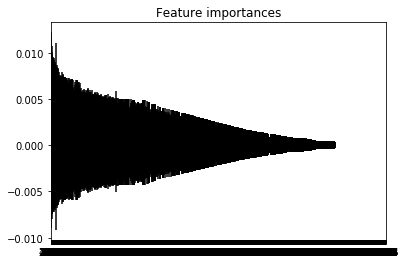

0
[[ 50 126]
 [ 51 141]
 [ 53 156]
 [ 56 172]
 [ 62 186]
 [ 72 198]
 [ 85 208]
 [101 215]
 [120 217]
 [137 213]
 [153 204]
 [165 192]
 [175 179]
 [179 164]
 [180 148]
 [180 132]
 [178 117]
 [ 64 107]
 [ 70  99]
 [ 80  95]
 [ 90  95]
 [100  98]
 [124  97]
 [133  92]
 [144  90]
 [154  92]
 [162  98]
 [113 112]
 [114 122]
 [114 132]
 [115 142]
 [102 151]
 [109 152]
 [116 154]
 [123 151]
 [130 149]
 [ 76 120]
 [ 82 116]
 [ 89 115]
 [ 96 119]
 [ 89 120]
 [ 82 120]
 [131 116]
 [137 112]
 [144 111]
 [151 114]
 [145 116]
 [138 116]
 [ 89 170]
 [ 99 166]
 [109 164]
 [117 165]
 [124 163]
 [135 164]
 [146 166]
 [136 178]
 [127 184]
 [118 186]
 [110 186]
 [ 99 182]
 [ 93 171]
 [109 169]
 [117 169]
 [125 168]
 [142 167]
 [126 176]
 [118 178]
 [109 177]]


NameError: name 'x1' is not defined

In [12]:
# Print the feature ranking
print("Feature ranking:")

for f in range(len(feature[1])):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(feature[1])), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(len(feature[1])), indices)
plt.xlim([-1, len(feature[1])])
plt.show()

dist1=[]
for i in p1:
    dist1.append(calc(i[0],i[1],i[2],i[3]))
print len(dist1)

for point in pq:
        print landmarks1
        x2,y2=landmarks1[point[1]]
        print x1,x2,y1,y2
        
print landmarks1[0]

print importances[4476]
print importances[indices[0]]
print 4476/68,4476%68
        